In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [31]:
# img = cv2.imread("low-contrast.png")
img = cv2.imread("page_with_illumination.jpg")
# img = cv2.imread("IMG_3528.JPG")
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

(2592, 1936, 3)


In [19]:
lab_img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
hist = cv2.calcHist([lab_img], [0], None, [256], [0, 256])
hist = cv2.normalize(hist, hist)

In [20]:
eq_lab_img = lab_img.copy()
eq_lab_img[:, :, 0] = cv2.equalizeHist(eq_lab_img[:, :, 0])

eq_l_hist = cv2.calcHist([eq_lab_img], [0], None, [256], [0, 256])
eq_l_hist = cv2.normalize(eq_l_hist, eq_l_hist)
eq_rgb_img = cv2.cvtColor(eq_lab_img, cv2.COLOR_LAB2RGB)

In [88]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(10, 10))
clh_lab_img = lab_img.copy()
clh_lab_img[:, :, 0] = clahe.apply(clh_lab_img[:, :, 0])

clh_l_hist = cv2.calcHist([clh_lab_img], [0], None, [256], [0, 256])
clh_l_hist = cv2.normalize(clh_l_hist, clh_l_hist)
clh_rgb_img = cv2.cvtColor(clh_lab_img, cv2.COLOR_LAB2RGB)

In [91]:
clh_gray_img = cv2.cvtColor(clh_rgb_img, cv2.COLOR_RGB2GRAY)
ret, thresh_img = cv2.threshold(clh_gray_img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# ret, thresh_img = cv2.threshold(clh_gray_img, 75, 255, cv2.THRESH_TRUNC)
# thresh_img = cv2.adaptiveThreshold(clh_gray_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
# thresh_img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)

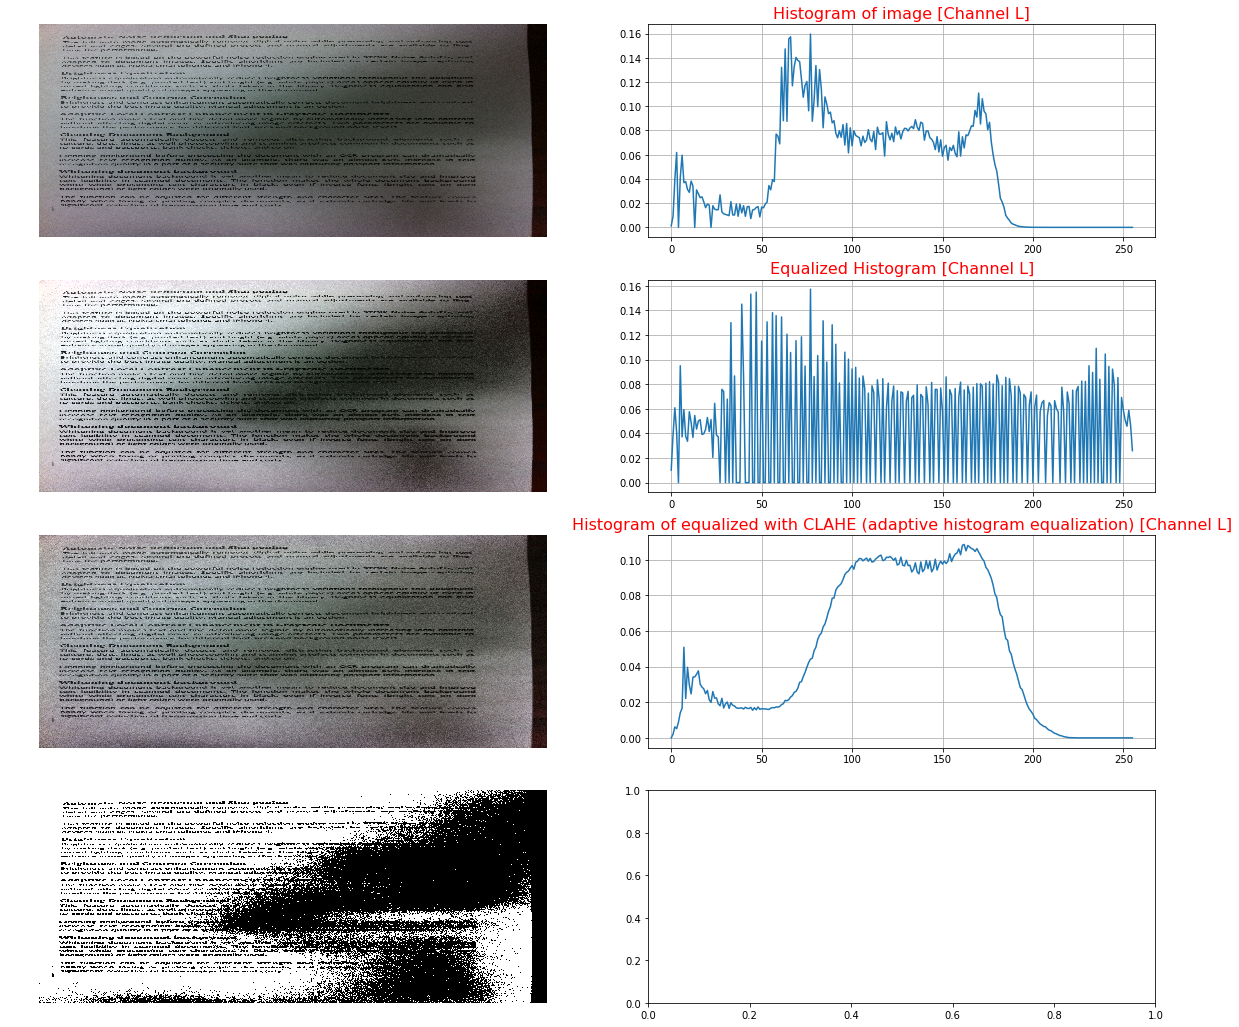

In [92]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=2, figsize=(20, 18))
ax1[0].set_axis_off()
ax1[0].imshow(rgb_img, aspect='auto')
ax1[1].grid()
ax1[1].set_title('Histogram of image [Channel L]', fontsize=16, color="red")
ax1[1].plot(hist)
ax2[0].set_axis_off()
ax2[0].imshow(eq_rgb_img, aspect='auto')
ax2[1].grid()
ax2[1].set_title('Equalized Histogram [Channel L]', fontsize=16, color="red")
ax2[1].plot(eq_l_hist)
ax3[0].set_axis_off()
ax3[0].imshow(clh_rgb_img, aspect='auto')
ax3[1].grid()
ax3[1].set_title('Histogram of equalized with CLAHE (adaptive histogram equalization) [Channel L]', fontsize=16, color="red")
ax3[1].plot(clh_l_hist)
ax4[0].set_axis_off()
ax4[0].imshow(thresh_img, aspect='auto', cmap='gray')
plt.show()